# Firing squad synchronization problem

https://www.youtube.com/watch?v=xV1aKUdlljU

https://en.wikipedia.org/wiki/Firing_squad_synchronization_problem

## Rules

- n robots, side by side
- robots can only see the robots next to them, and are defined by states that can change at each step taken
- only a given set of states is available from the start, 1st is idle, last is "fire"
- all transitions happen at the same time
- the transition rules can only take the current state into account (the robot state and its 2 neighbours states)
    - robots at the edges have a special set of rules since they're missing a neighbour
    - the transition rules must include that an idle robot with idle neighbor(s) transitions to the idle state
- all initial states are idle
<!-- - we give the order to fire to the first robot, and it should communicate the order to the rest of the squad so that they all fire on the same step -->
- at step 0, we switch the first robot from the state 0 (idle) to the state 1

## GOAL: find a set of states and transition rules such that all robots reach the last step (fire) at the same time (without reaching it before), for any initial number of robots.

### Even number of soldiers

-> The first wave is gonna divide the entire line into 2 lines with the same number of robots => for 6 robots:
```
0 0 3 5 0 0
```
No actions needed => subdivide normally

### Uneven number of soldiers

-> The first wave is gonna divide the entire line into 2 lines with the same number of robots, and a lone robot in the middle => for 7 robots:
```
0 0 4 1 5 0 0
```
In this case, give the middle robot a special state (ready), which he is going to keep until the end (acts as a new wall)<br>
To the left and right of him, the number of robots is even, default to general case => subdivide normally

**States**
- 0: idle
- 1: active_0
- 2: wait_0_0
- 3: wait_0_1
- 4: wait_0_2
- 5: bounce_0
- 6: active_1
- 7: wait_1_0
- 8: wait_1_1
- 9: wait_1_2
- 10: bounce_1
- 11: bounce_1_bis (special bounce_1 when previous neighbour is wall and next neighbour is not active_0)
- 12: divide
- 13: wall
- 14: fire

In [1]:
from __future__ import annotations
from typing import Optional

In [2]:
class Robot:

    def __init__(self, position: int):
        self._position = position
        self._is_last = False
        self.state = 0
        self.next_state = None

    @property
    def position(self) -> int:
        return self._position

    @property
    def is_first(self) -> bool:
        return (self.position == 0)

    @property
    def is_last(self) -> bool:
        return self._is_last

    @property
    def is_solo(self) -> bool:
        return (self.is_first and self.is_last)

    def transition(self, verbose: bool = False):
        print(f"updating state of robot #{self.position}") if verbose else ...
        if self.next_state is None:
            raise ValueError("This robot's next state is None.")
        self.state = self.next_state
        self.next_state = None

    def reset(self, verbose: bool = False):
        print(f"resetting robot #{self.position}")
        self.state = 0
        self.next_state = None

    def determine_next_state(self, previous_neighbour: Optional[Robot] = None, next_neighbour: Optional[Robot] = None, verbose: bool = False):
        print(f"determining next state for robot #{self.position}") if verbose else ...


        if self.is_solo:
            # TODO
            ...


        elif self.is_first:
            print("robot is first") if verbose else ...
            # allowed states: 0, 1, 2, 3, 4, 6, 10, 14

            if self.state in [0]:
                print("state is idle") if verbose else ...
                # allowed next states: 0, 6
                if next_neighbour.state in [6,12]:
                    print("next neighbour is active_1 or divide, go active_1") if verbose else ...
                    self.next_state = 6
                else:
                    print("default, go idle") if verbose else ...
                    self.next_state = self.state

            elif self.state in [1,2]:
                print("state is active_0 or wait_0_0, wait longer") if verbose else ...
                self.next_state = self.state + 1

            elif self.state in [3]:
                print("state is wait_0_1") if verbose else ...
                # allowed next states: 4, 6
                if next_neighbour.state in [1]:
                    print("next neighbour is active_0, go wait_0_2") if verbose else ...
                    self.next_state = 4
                elif next_neighbour.state in [5]:
                    print("next neighbour is bounce_0, go active_1") if verbose else ...
                    self.next_state = 6

            elif self.state in [4]:
                print("state is wait_0_2, go idle") if verbose else ...
                self.next_state = 0

            elif self.state in [6]:
                print("state is active_1, go bounce_1") if verbose else ...
                self.next_state = 10

            elif self.state in [10]:
                print("state is bounce_1") if verbose else ...
                # allowed next states: 0, 6, 14
                if next_neighbour.state in [8]:
                    print("next neighbour is wait_1_1, go active_1") if verbose else ...
                    self.next_state = 6
                elif next_neighbour.state in [6]:
                    print("next neighbour is active_1, go idle") if verbose else ...
                    self.next_state = 0
                elif next_neighbour.state in [5,13]:
                    print("next neighbour is bounce_0 or wall, go fire") if verbose else ...
                    self.next_state = 14

            elif self.state in [14]:
                print("state is fire") if verbose else ...
                # allowed next states: 14
                if next_neighbour.state in [14]:
                    print("next neighbour is fire, go fire") if verbose else ...
                    self.next_state = self.state


        elif self.is_last:
            print("robot is last") if verbose else ...
            # allowed states: 0, 1, 5, 14

            if self.state in [0]:
                print("state is idle") if verbose else ...
                # allowed next states: 0, 1
                if previous_neighbour.state in [1,12]:
                    print("previous neighbour is active_0, go active_0") if verbose else ...
                    self.next_state = 1
                else:
                    print("default, go idle") if verbose else ...
                    self.next_state = self.state

            elif self.state in [1]:
                print("state is active_0, go bounce_0") if verbose else ...
                self.next_state = 5

            elif self.state in [5]:
                print("state is bounce_0") if verbose else ...
                # allowed next states: 0, 1, 14
                if previous_neighbour.state in [1]:
                    print("previous neighbour is active_0, go idle") if verbose else ...
                    self.next_state = 0
                elif previous_neighbour.state in [3]:
                    print("previous neighbour is wait_0_1, go active_0") if verbose else ...
                    self.next_state = 1
                elif previous_neighbour.state in [10,13]:
                    print("previous neighbour is bounce_1 or wall, go fire") if verbose else ...
                    self.next_state = 14

            elif self.state in [14]:
                print("state is fire") if verbose else ...
                # allowed next states: 14
                if previous_neighbour.state in [14]:
                    print("previous neighbour is fire, go fire") if verbose else ...
                    self.next_state = self.state


        else:
            print("robot is link") if verbose else ...
            # # allowed states: all of them

            if self.state in [0]:
                print("state is idle") if verbose else ...
                # allowed next states: 0, 1, 6
                if previous_neighbour.state in [1,12]:
                    print("previous neighbour is active_0, go active_0") if verbose else ...
                    self.next_state = 1
                elif next_neighbour.state in [6,12]:
                    print("next neighbour is active_1, go active_1") if verbose else ...
                    self.next_state = 6
                else:
                    print("default, stay idle") if verbose else ...
                    self.next_state = self.state

            elif self.state in [1]:
                print("state is active_0") if verbose else ...
                # allowed next states: 1, 2, 5, 12
                if previous_neighbour.state in [4] and next_neighbour.state in [5]:
                    print("previous neighbour is wait_0_2 and next neighbour is bounce_0, go divide") if verbose else ...
                    self.next_state = 12
                elif next_neighbour.state in [5,6,13]:
                    print("next neighbour is bounce_0 or active_1, go bounce_0") if verbose else ...
                    self.next_state = 5
                elif previous_neighbour.state in [4,6,13]:
                    print("previous neighbour is wait_0_2, bounce_, go wait_0_0") if verbose else ...
                    self.next_state = 2
                else:
                    print("default, stay active_0") if verbose else ...
                    self.next_state = self.state

            elif self.state in [2]:
                print("state is wait_0_0, go wait_0_1") if verbose else ...
                # wait_0_0 becomes wait_0_1 in every situations
                self.next_state = 3

            elif self.state in [3]:
                print("state is wait_0_1") if verbose else ...
                # allowed next states: 4, 6
                if next_neighbour.state in [1]:
                    print("next neighbour is active_0, go wait_0_2") if verbose else ...
                    self.next_state = 4
                elif next_neighbour.state in [5]:
                    print("next neighbour is bounce_0, go active_1") if verbose else ...
                    self.next_state = 6

            elif self.state in [4]:
                print("state is wait_0_2, go idle") if verbose else ...
                # wait_0_2 becomes idle in every situations
                self.next_state = 0

            elif self.state in [5]:
                print("state is bounce_0") if verbose else ...
                # allowed next states: 0, 1, 14
                if previous_neighbour.state in [10,13]:
                    print("previous neighbour is bounce_1 or wall, go fire") if verbose else ...
                    self.next_state = 14
                elif previous_neighbour.state in [3]:
                    print("previous neighbour is wait_0_1, go active_0") if verbose else ...
                    self.next_state = 1
                elif previous_neighbour.state in [1]:
                    print("previous neighbour is active_0, go idle") if verbose else ...
                    self.next_state = 0

            elif self.state in [6]:
                print("state is active_1") if verbose else ...
                # allowed next states: 6, 7, 10, 11, 12
                if previous_neighbour.state in [10,11] and next_neighbour.state in [9]:
                    print("previous neighbour is bounce_1 or bounce_1_bis and next neighbour is wait_1_2, go divide") if verbose else ...
                    self.next_state = 12
                # 11: special bounce_1 when previous neighbour is wall and next neighbour is not active_0
                elif previous_neighbour.state in [13] and next_neighbour.state in [6,7]:
                    print("previous neighbour is wall and next neighbour is active_1 or wait_1_0, go bounce_1_bis") if verbose else ...
                    self.next_state = 11
                elif previous_neighbour.state in [1,10,11,13]:
                    print("previous neighbour is active_0, bounce_1, or wall, go bounce_1") if verbose else ...
                    self.next_state = 10
                elif next_neighbour.state in [1,9,13]:
                    print("next neighbour is active_0, wait_1_2, or wall, go wait_1_0") if verbose else ...
                    self.next_state = 7
                else:
                    print("default, stay active_1") if verbose else ...
                    self.next_state = self.state

            elif self.state in [7]:
                print("state is wait_1_0, go wait_1_1") if verbose else ...
                self.next_state = 8

            elif self.state in [8]:
                print("state is wait_1_1") if verbose else ...
                # allowed next states: 1, 9
                if previous_neighbour.state in [6]:
                    print("previous neighbour is active_1, go wait_1_2") if verbose else ...
                    self.next_state = 9
                elif previous_neighbour.state in [10,11]:
                    print("previous neighbour is bounce_1 or bounce_1_bis, go active_0") if verbose else ...
                    self.next_state = 1

            elif self.state in [9]:
                print("state is wait_1_2, go idle") if verbose else ...
                # wait_1_2 becomes idle in every situations
                self.next_state = 0

            elif self.state in [10]:
                print("state is bounce_1") if verbose else ...
                # allowed next states: 0, 6, 14
                if next_neighbour.state in [5,13]:
                    print("next neighbour is bounce_0 or wall, go fire") if verbose else ...
                    self.next_state = 14
                elif next_neighbour.state in [8]:
                    print("next neighbour is wait_1_1, go active_1") if verbose else ...
                    self.next_state = 6
                elif next_neighbour.state in [6]:
                    print("next neighbour is active_1, go idle") if verbose else ...
                    self.next_state = 0

            elif self.state in [11]:
                print("state is bounce_1_bis") if verbose else ...
                # allowed next states: 0, 6
                if next_neighbour.state in [8]:
                    print("next neighbour is wait_1_1, go active_1") if verbose else ...
                    self.next_state = 6
                elif next_neighbour.state in [6]:
                    print("next neighbour is active_1, go idle") if verbose else ...
                    self.next_state = 0

            elif self.state in [12]:
                print("state is divide") if verbose else ...
                # divide becomes wall in every situations
                self.next_state = 13

            elif self.state in [13]:
                print("state is wall") if verbose else ...
                # allowed next states: 13, 14
                if previous_neighbour.state in [5,10] and next_neighbour.state in [5,10]:
                    print("previous neighbour is bounce_0 or bounce_1 and next neighbour is bounce_0 or bounce_1, go fire") if verbose else ...
                    self.next_state = 14
                else:
                    print("default, stay wall") if verbose else ...
                    self.next_state = self.state

            elif self.state in [14]:
                print("state is fire") if verbose else ...
                # fire stays fire
                self.next_state = 14

None

In [3]:
class FiringSquad:

    def __init__(self, number_robots: int):
        if n <= 0:
            raise ValueError("The firing squad cannot be empty.")
        self.n = number_robots
        self.squad = tuple(Robot(position) for position in range(self.n))
        self.squad[-1]._is_last = True
        self.step = 0

    def transition(self, verbose: bool = False):
        # calculate the new state for every robot
        if self.n >= 3:
            self.squad[0].determine_next_state(next_neighbour=self.squad[1], verbose=verbose)
            print() if verbose else ...
            for position, robot in list(enumerate(self.squad))[1:-1]:
                robot.determine_next_state(previous_neighbour=self.squad[position-1], next_neighbour=self.squad[position+1], verbose=verbose)
                print() if verbose else ...
            self.squad[-1].determine_next_state(previous_neighbour=self.squad[-2], verbose=verbose)
            print() if verbose else ...
        elif self.n == 2:
            self.squad[0].determine_next_state(next_neighbour=self.squad[1], verbose=verbose)
            print() if verbose else ...
            self.squad[1].determine_next_state(previous_neighbour=self.squad[0], verbose=verbose)
            print() if verbose else ...
        elif self.n == 1:
            self.squad[0].determine_next_state(verbose=verbose)
            print() if verbose else ...
        # check that no new state is None
        for robot in self.squad:
            if robot.next_state is None:
                raise RuntimeError(f"The next state of the robot #{robot.position} is None")
        # set the state as the new state
        for robot in self.squad:
            robot.transition(verbose)
        # increment step
        self.step += 1

    def poke(self, as_transition: bool = True, verbose: bool = False):
        print("--squad poke--") if verbose else ...
        # give the order to fire to the first robot
        self.squad[0].state = 1
        if as_transition:
            self.step += 1

    def reset(self, poke: bool = False, verbose: bool = False):
        print("--squad reset--") if verbose else ...
        self.__init__(self.n)
        if poke:
            self.poke(as_transition=False, verbose=verbose)

    @property
    def has_fired(self) -> bool:
        has_fired = True
        for robot in self.squad:
            if robot.state != 14:
                has_fired = False
        if not has_fired:
            for robot in self.squad:
                if robot.state == 14:
                    raise RuntimeError("Only some of the robots have fired.")
        return has_fired

In [4]:
# verbose = False
# # verbose = True
# n =10

# firing_squad = FiringSquad(number_robots=n)
# # firing_squad.poke(verbose=verbose)
# # firing_squad.reset(verbose=verbose)
# # firing_squad.reset(poke=True, verbose=verbose)

# print(f"#{firing_squad.step}".ljust(6), end="")
# for robot in firing_squad.squad:
#     print(f"{robot.state}".ljust(2), end = " ")

In [4]:
verbose = False
# verbose = True
n = 31

firing_squad = FiringSquad(number_robots=n)

while not (firing_squad.has_fired):
    print() if verbose else ...
    print(f"#{firing_squad.step}".ljust(6), end="")
    for robot in firing_squad.squad:
        print(f"{robot.state}".ljust(3), end = "")
    print()
    print() if verbose else ...
    # if firing_squad.step == 28:
    #     verbose = True
    if firing_squad.step == 0:
        firing_squad.poke(verbose=True)
    else:
        firing_squad.transition(verbose=verbose)
print() if verbose else ...
print(f"#{firing_squad.step}".ljust(6), end="")
for robot in firing_squad.squad:
    print(f"{robot.state}".ljust(3), end = "")

#0    0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
--squad poke--
#1    1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
#2    2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
#3    3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
#4    4  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
#5    0  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
#6    0  3  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
#7    0  4  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
#8    0  0  2  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
#9    0  0  3  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [6]:
# firing_squad.reset(verbose=True)

# while not (firing_squad.has_fired):
#     print(f"#{firing_squad.step}".ljust(6), end="")
#     for robot in firing_squad.squad:
#         print(f"{robot.state}".ljust(3), end = "")
#     print()
#     if firing_squad.step == 0:
#         firing_squad.poke(verbose=True)
#     else:
#         firing_squad.transition(verbose=verbose)
# print() if verbose else ...
# print(f"#{firing_squad.step}".ljust(6), end="")
# for robot in firing_squad.squad:
#     print(f"{robot.state}".ljust(3), end = "")

## Matplotlib

### States history

make a list of list of states `[robot_1.state, robot_2.state ... ]`

In [7]:
n = 31
firing_squad = FiringSquad(number_robots=n)
firing_squad_history = []
while not (firing_squad.has_fired):
    firing_squad_history.append([robot.state for robot in firing_squad.squad])
    if firing_squad.step == 0:
        firing_squad.poke()
    else:
        firing_squad.transition()
firing_squad_history.append([robot.state for robot in firing_squad.squad])

In [8]:
# firing_squad_history

### States colors

|     state     |    color    |
|:------------:|:-----------:
|   idle       |   white     ||
|   active_0   | tomato    | |
|   wait_0_0   |  firebrick  |
|   wait_0_1   |    brown    |
|   wait_0_2   |    maroon   |
|   bounce_0   | darkmagenta |
|   active_1   |    yellow   |
|   wait_1_0   |     gold    |
|   wait_1_1   |    orange   |
|   wait_1_2   |  darkorange |
|   bounce_1   |    green    |
| bounce_1_bis |  limegreen  |
|    divide    |     cyan    |
|     wall     |   darkcyan  |
|     fire     |     blue    | fire     |   | fire     |   | fire     |   |

In [9]:
# mcolors.BASE_COLORS

In [10]:
# mcolors.TABLEAU_COLORS

In [11]:
# mcolors.CSS4_COLORS
# for key in mcolors.CSS4_COLORS:
#     print(key)


In [5]:
states_colors = ["white", "tomato", "firebrick", "brown", "maroon", "darkmagenta", "yellow", "gold", "orange", "darkorange", "green", "limegreen", "cyan", "darkcyan", "blue"]
# state = 5
# mcolors.CSS4_COLORS[states_colors[state]]

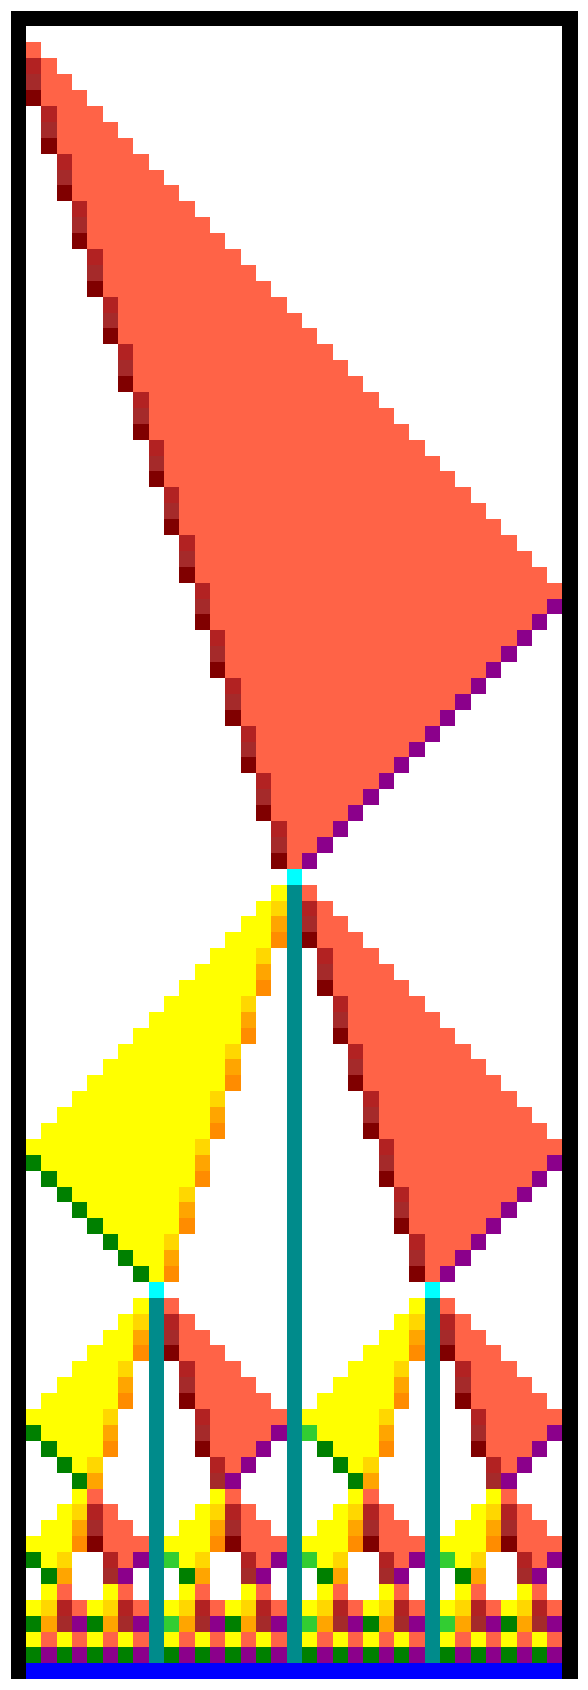

In [7]:
# import matplotlib
# matplotlib.use('PDF')
import matplotlib.pyplot as plt
# dpi: ~109
import matplotlib.colors as mcolors

n = 35
firing_squad = FiringSquad(number_robots=n)
firing_squad_history = []
while not (firing_squad.has_fired):
    firing_squad_history.append([robot.state for robot in firing_squad.squad])
    if firing_squad.step == 0:
        firing_squad.poke()
    else:
        firing_squad.transition()
firing_squad_history.append([robot.state for robot in firing_squad.squad])

# .15 inches per length and width
width_inch = .15 * (firing_squad.n + 2)
height_inch = .15 * (len(firing_squad_history) + 1)

fig, ax = plt.subplots(figsize=(width_inch,height_inch), dpi=108)

# top black line
for black_box_position in range(firing_squad.n + 2):
    ax.bar(
        x= -1 + black_box_position,
        height=1,
        width=1,
        bottom=1,
        align='edge',
        color=mcolors.CSS4_COLORS["black"]
    )

for step_number, step_states in enumerate(firing_squad_history):
    # each step is a line, first step on top
    ax.bar(
        x=-1,
        height=1,
        width=1,
        bottom=-step_number,
        align='edge',
        color=mcolors.CSS4_COLORS["black"]
    )
    for robot_position, robot_state in enumerate(step_states):
        # each state is a column, first state on the left
        ax.bar(
            x=robot_position,
            height=1,
            width=1,
            bottom=-step_number,
            align='edge',
            color=mcolors.CSS4_COLORS[states_colors[robot_state]]
        )
    ax.bar(
        x=robot_position+1,
        height=1,
        width=1,
        bottom=-step_number,
        align='edge',
        color=mcolors.CSS4_COLORS["black"]
    )

plt.xlim(-1,len(step_states)+1)
plt.ylim(-len(firing_squad_history)+1,2)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
ax.spines[:].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
for item in enumerate(["a", "b", "c"]):
    print(item)

In [ ]:
# dir(firing_squad)
firing_squad.n + 2

In [ ]:
len(firing_squad_history) + 1

In [ ]:
# 98 height -> 15 inches
# => 1 height -> 0.15 inches

# 34 width -> 5 inches
# => 1 width -> 0.15 inches
5/34

In [ ]:
plt.figure?

In [18]:
64+32

96

# DUMP